In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.transforms import Bbox
import random

In [2]:
def cells_creator(labyrinth, size_cells, quant_cells, wall_size):
    cells = {}

    for i in range(quant_cells):
        for j in range(quant_cells):
            cells[(i, j)] = Cell(labyrinth[i * size_cells: i * size_cells + size_cells + wall_size,
                                           j * size_cells: j * size_cells + size_cells + wall_size],
                                 (i, j), quant_cells)
    return cells


class Cell:
    up = None
    down = None
    left = None
    right = None

    def __init__(self, array, cord, size):
        self.__array = array

        """
        False - Открыт, идти нельзя
        True - Закрыт, но можно пройти
        """
        if cord[0]:
            self.up = True
        if cord[0] != size - 1:
            self.down = True
        if cord[1]:
            self.left = True
        if cord[1] != size - 1:
            self.right = True

    def open_side(self, side, wall_size):
        if side == 'up':
            self.__array[:wall_size, 1: -1] = 0
            self.up = False
        elif side == 'down':
            self.__array[0 - wall_size:, 1: -1] = 0
            self.down = False
        elif side == 'left':
            self.__array[1: -1, :wall_size] = 0
            self.left = False
        elif side == 'right':
            self.__array[1: -1, 0 - wall_size:] = 0
            self.right = False
    
    @staticmethod
    def get_over_side(direction):
        if direction in ('up', 'down'):
            return direction == 'up' and 'down' or 'up'
        elif direction in ('left', 'right'):
            return direction == 'left' and 'right' or 'left'
    
    def get_open_sides(self):
        directions = []
        if self.up:
            directions.append('up')
        if self.down:
            directions.append('down')
        if self.left:
            directions.append('left')
        if self.right:
            directions.append('right')
        return directions
    
    def is_open(self):
        arr = np.array([self.up, self.down, self.left, self.right])
        return arr[arr == False].shape[0] == 0


class Labyrinth:
    __labyrinth = None
    __size_sells = None
    __wall_size = 1

    def __init__(self, size_place=100, quant_cells=10):
        self.__start = [0, 0]
        self.__cursor = self.__start[:]
        self.history = [self.__cursor[:]]
        self.__size_place = size_place
        self.__quant_cells = quant_cells
        self.__border = int(self.__size_place * .1)
        self.__size_labyrinth = self.__size_place - self.__border
        self.__place = np.zeros((self.__size_place, self.__size_place))
        self.__draw_wall()
        self.__cells = cells_creator(self.__labyrinth, self.__size_cells, self.__quant_cells, self.__wall_size)
        

    def __draw_wall(self):
        self.__size_cells = self.__size_labyrinth // self.__quant_cells
        end_pos = self.__border // 2 + self.__quant_cells * self.__size_cells
        border = (self.__size_place - end_pos + self.__border // 2) // 2

        if self.__size_place >= 300:
            self.__wall_size = self.__size_place // 200
        
        for i in range(border, self.__size_place - border + 1, self.__size_cells):
            # horizontal
            self.__place[i: i + self.__wall_size, border: end_pos + 1] = 1

            # vertical
            self.__place[border: end_pos + 1, i: i + self.__wall_size] = 1

        self.__labyrinth = self.__place[border: end_pos + self.__wall_size, border: end_pos + self.__wall_size]
    
    def move(self):
        while True:
            cell = self.__cells[tuple(self.__cursor)]
            directions = cell.get_open_sides()
            next_cells = {}
            for direction in directions:
                cursor = list(self.__cursor[:])
                if direction == 'up':
                    cursor[0] -= 1
                elif direction == 'down':
                    cursor[0] += 1
                elif direction == 'left':
                    cursor[1] -= 1
                elif direction == 'right':
                    cursor[1] += 1
                if self.__cells[tuple(cursor)].is_open():
                    next_cells[tuple(cursor)] = direction

            if next_cells:
                next_num_cell = random.choice(list(next_cells.keys()))
                self.history.append(next_num_cell)
                self.__cursor = list(next_num_cell)
                cell.open_side(next_cells[next_num_cell], self.__wall_size)
                self.__cells[next_num_cell].open_side(Cell.get_over_side(next_cells[next_num_cell]), self.__wall_size)
            else:
                self.__cursor = self.history.pop(-1)
            
            if self.__cursor == self.__start:
                break
        
                
    def show(self):
        return self.__place

In [3]:
def get_lab(size=350, cells=35):
    lab = Labyrinth(size, cells)
    lab.move()
    return lab.show()


def get_rgb_lab(size=350, cells=35):
    lab = get_lab(size, cells)

    lab_rgb = np.zeros((size, size, 3), dtype='int')
    lab_rgb[:, :, 0] = lab
    lab_rgb[:, :, 1] = lab
    lab_rgb[:, :, 2] = lab

    rnd = np.random.randint

    for i, c in enumerate((rnd(150, 256), rnd(150, 256), rnd(150, 256))):
        lab_rgb[:, :, i][lab_rgb[:, :, i] == 1] = c


    for i, c in enumerate((rnd(100), rnd(100), rnd(100))):
        lab_rgb[:, :, i][lab_rgb[:, :, i] == 0] = c
    
    return lab_rgb

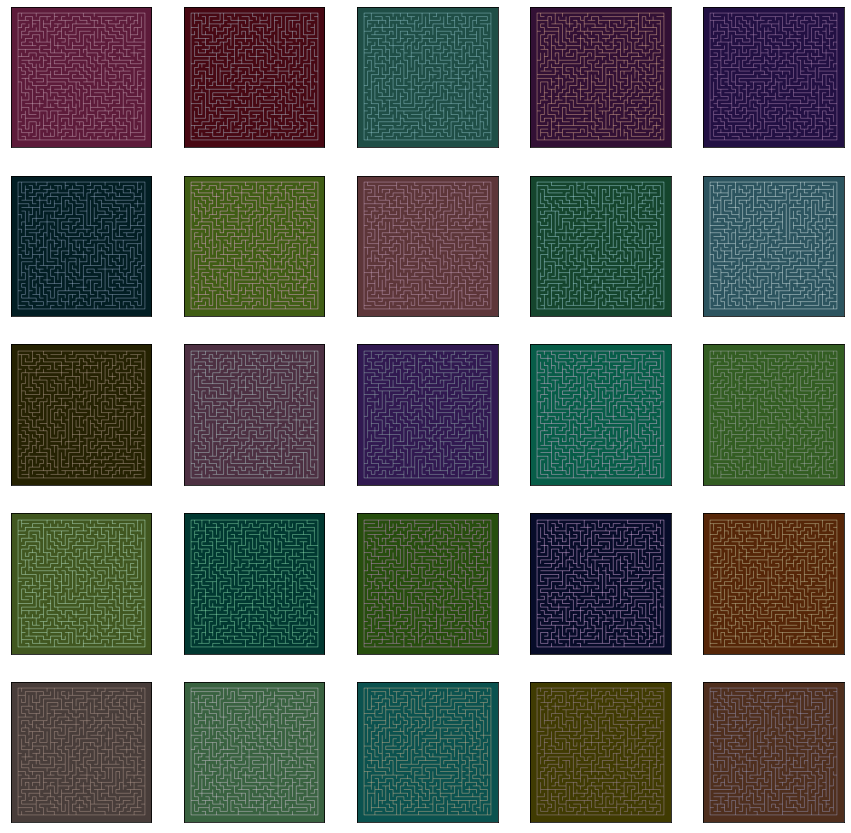

In [38]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i in range(25):
    axs[i%5, i//5].imshow(get_rgb_lab())
    axs[i%5, i//5].get_xaxis().set_visible(False)
    axs[i%5, i//5].get_yaxis().set_visible(False)

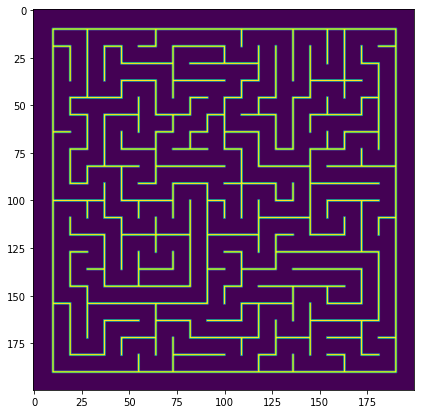

In [26]:
plt.figure(figsize=(7, 7))
plt.imshow(get_lab(200, 20))

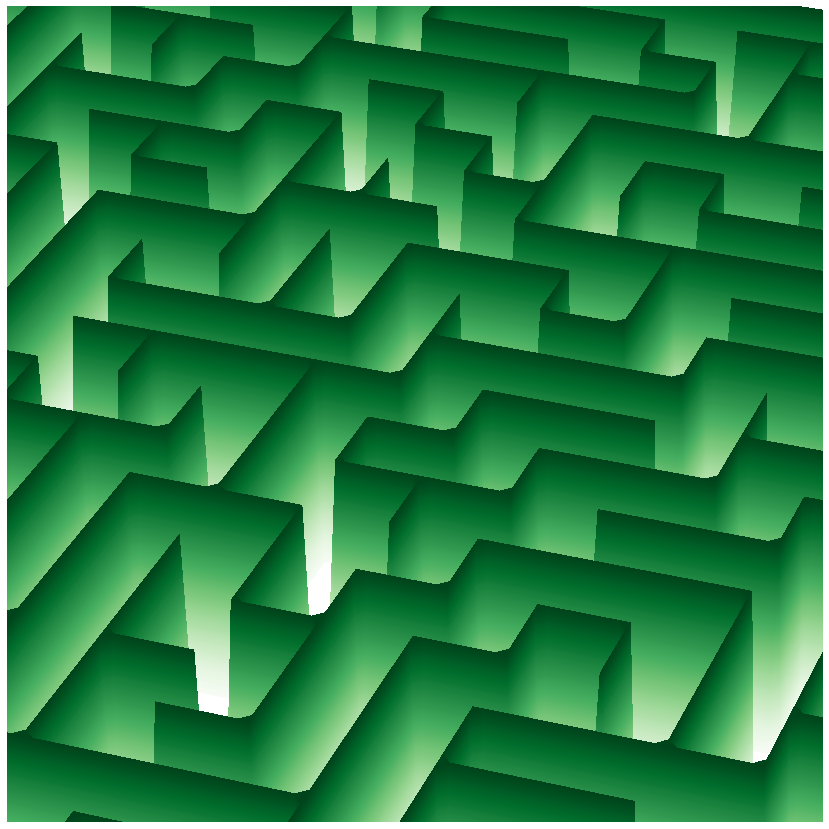

In [102]:
for c in ['Greens']:
    for i in [230]:  # 100, 200, 250, 300,
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(projection='3d')

        size = i
        height = 5  # >2
        line = 300
        dpi = 1000
        cmap_str = c

        lab = get_lab(size, size // 10).astype('int')
        X = np.arange(size)
        Y = np.arange(size)
        Z = lab

        X, Y = np.meshgrid(X, Y)

        cs = ax.contourf(X, Y, Z, line, cmap=cm.get_cmap(cmap_str).copy(), extend ='both')
        cs.cmap.set_under('white')
        cs.changed()
        ax.set_zlim(-(height - 2), height)
#         ax.view_init(elev=70, azim=20)
#         ax.dist=7
        ax.view_init(elev=30, azim=20)
        ax.dist=2

        plt.axis('off')

        plt.savefig(f'C:\\Users\\admin\\Ai\\lab\\{cmap_str}_{size}_{line}_{dpi}.png', format='png', dpi=dpi)